# <center>Albergi Dataset</center>
## <center>Exploratory Data Analysis + Data Visualization + Modelling</center>

### Importing Libraries

In [1]:
import numpy as np # library to handle data in a vectorized manner
import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
import requests # library to handle requests
import json # library to handle JSON files
import urllib.request  # for opening and reading URLs
import seaborn as sns  # data visualization library 
import matplotlib.cm as cm
import matplotlib.colors as colors
import xgboost as xgb

from matplotlib import pyplot as plt #plotting
from xgboost import XGBClassifier
from sklearn import tree
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.metrics import classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from warnings import filterwarnings
filterwarnings('ignore')
print('Libraries imported!')

Libraries imported!


### Loading Dataset

In [2]:
df = pd.read_csv(r'C:\Users\Haluk Sumen\Desktop\Project\alberghi\classification_dataset.csv', delimiter="\t")

### Exploratory Data Analysis

In [3]:
#First Look of Dataset
df.head()

,ID,PROVINCIA,COMUNE,LOCALITA,CAMERE,SUITE,LETTI,BAGNI,PRIMA_COLAZIONE,IN_ABITATO,SUL_LAGO,VICINO_ELIPORTO,VICINO_AEREOPORTO,ZONA_CENTRALE,VICINO_IMP_RISALITA,ZONA_PERIFERICA,ZONA_STAZIONE_FS,ATTREZZATURE_VARIE,CARTE_ACCETTATE,LINGUE_PARLATE,SPORT,CONGRESSI,LATITUDINE,LONGITUDINE,OUTPUT
0,0,BS,PERTICA BASSA,NaN,2,0,4,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,10.373501,45.751381,B&B
1,1,BS,DESENZANO DEL GARDA,NaN,4,0,8,4,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,10.538947,45.469485,B&B
2,2,BG,BERGAMO,NaN,1,0,2,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Accettazione animali domestici,NaN,NaN,NaN,NaN,9.665355,45.704158,Case_Appartamenti
3,3,MN,MANTOVA,BOCCABUSA,93,2,194,96,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"Ascensore,Ristorante,Bar,Accettazione animali ...","American express,Visa,Master Card,Diners,Maest...","Inglese,Francese,Spagnolo,Tedesco,Rumeno,Serbo...",NaN,"Numero sale congressi 3,Congressi capacita' Mi...",10.828175,45.165506,4_a_5_Stelle
4,4,MI,MILANO,NaN,2,0,4,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,9.151637,45.457177,Case_Appartamenti


In [4]:
df.shape

(6775, 25)

In [5]:
#Checking data types
df.dtypes

ID                       int64
PROVINCIA               object
COMUNE                  object
LOCALITA                object
CAMERE                   int64
SUITE                    int64
LETTI                    int64
BAGNI                    int64
PRIMA_COLAZIONE          int64
IN_ABITATO             float64
SUL_LAGO               float64
VICINO_ELIPORTO        float64
VICINO_AEREOPORTO      float64
ZONA_CENTRALE          float64
VICINO_IMP_RISALITA    float64
ZONA_PERIFERICA        float64
ZONA_STAZIONE_FS       float64
ATTREZZATURE_VARIE      object
CARTE_ACCETTATE         object
LINGUE_PARLATE          object
SPORT                   object
CONGRESSI               object
LATITUDINE             float64
LONGITUDINE            float64
OUTPUT                  object
dtype: object

In [6]:
#Checking number of NaN 
print("# of NaN in each columns:", df.isnull().sum(), sep='\n')

# of NaN in each columns:
ID                        0
PROVINCIA                 0
COMUNE                    0
LOCALITA               6208
CAMERE                    0
SUITE                     0
LETTI                     0
BAGNI                     0
PRIMA_COLAZIONE           0
IN_ABITATO              107
SUL_LAGO                107
VICINO_ELIPORTO         107
VICINO_AEREOPORTO       107
ZONA_CENTRALE           107
VICINO_IMP_RISALITA     107
ZONA_PERIFERICA         107
ZONA_STAZIONE_FS        107
ATTREZZATURE_VARIE     2759
CARTE_ACCETTATE        4705
LINGUE_PARLATE         3680
SPORT                  6168
CONGRESSI              6468
LATITUDINE               47
LONGITUDINE              47
OUTPUT                    0
dtype: int64


In [7]:
#Dropping Unrelevant Columns
df.drop(['LOCALITA', 'SPORT','CONGRESSI','LATITUDINE','LONGITUDINE'], axis = 1, inplace=True)
df.head()

,ID,PROVINCIA,COMUNE,CAMERE,SUITE,LETTI,BAGNI,PRIMA_COLAZIONE,IN_ABITATO,SUL_LAGO,VICINO_ELIPORTO,VICINO_AEREOPORTO,ZONA_CENTRALE,VICINO_IMP_RISALITA,ZONA_PERIFERICA,ZONA_STAZIONE_FS,ATTREZZATURE_VARIE,CARTE_ACCETTATE,LINGUE_PARLATE,OUTPUT
0,0,BS,PERTICA BASSA,2,0,4,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,B&B
1,1,BS,DESENZANO DEL GARDA,4,0,8,4,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,B&B
2,2,BG,BERGAMO,1,0,2,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Accettazione animali domestici,NaN,NaN,Case_Appartamenti
3,3,MN,MANTOVA,93,2,194,96,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"Ascensore,Ristorante,Bar,Accettazione animali ...","American express,Visa,Master Card,Diners,Maest...","Inglese,Francese,Spagnolo,Tedesco,Rumeno,Serbo...",4_a_5_Stelle
4,4,MI,MILANO,2,0,4,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,Case_Appartamenti


In [8]:
#Dropping NaN Rows in Columns 
df.dropna(subset=['IN_ABITATO', 'SUL_LAGO', 'VICINO_ELIPORTO',
                  'VICINO_AEREOPORTO', 'ZONA_CENTRALE', 'VICINO_IMP_RISALITA',
                  'ZONA_PERIFERICA', 'ZONA_STAZIONE_FS'], axis = 0, inplace=True)

In [9]:
df.shape

(6668, 20)

In [10]:
print("# of NaN in each columns:", df.isnull().sum(), sep='\n')

# of NaN in each columns:
ID                        0
PROVINCIA                 0
COMUNE                    0
CAMERE                    0
SUITE                     0
LETTI                     0
BAGNI                     0
PRIMA_COLAZIONE           0
IN_ABITATO                0
SUL_LAGO                  0
VICINO_ELIPORTO           0
VICINO_AEREOPORTO         0
ZONA_CENTRALE             0
VICINO_IMP_RISALITA       0
ZONA_PERIFERICA           0
ZONA_STAZIONE_FS          0
ATTREZZATURE_VARIE     2690
CARTE_ACCETTATE        4600
LINGUE_PARLATE         3609
OUTPUT                    0
dtype: int64


In [11]:
#Changing Float Data Types to Integer 
df[['IN_ABITATO', 'SUL_LAGO', 'VICINO_ELIPORTO','VICINO_AEREOPORTO', 'ZONA_CENTRALE', 'VICINO_IMP_RISALITA', 'ZONA_PERIFERICA', 'ZONA_STAZIONE_FS']] = df[['IN_ABITATO', 'SUL_LAGO', 'VICINO_ELIPORTO','VICINO_AEREOPORTO', 'ZONA_CENTRALE', 'VICINO_IMP_RISALITA', 'ZONA_PERIFERICA', 'ZONA_STAZIONE_FS']].astype('int64')

<AxesSubplot:title={'center':'# of Places according to Their Types '}, xlabel='OUTPUT', ylabel='count'>

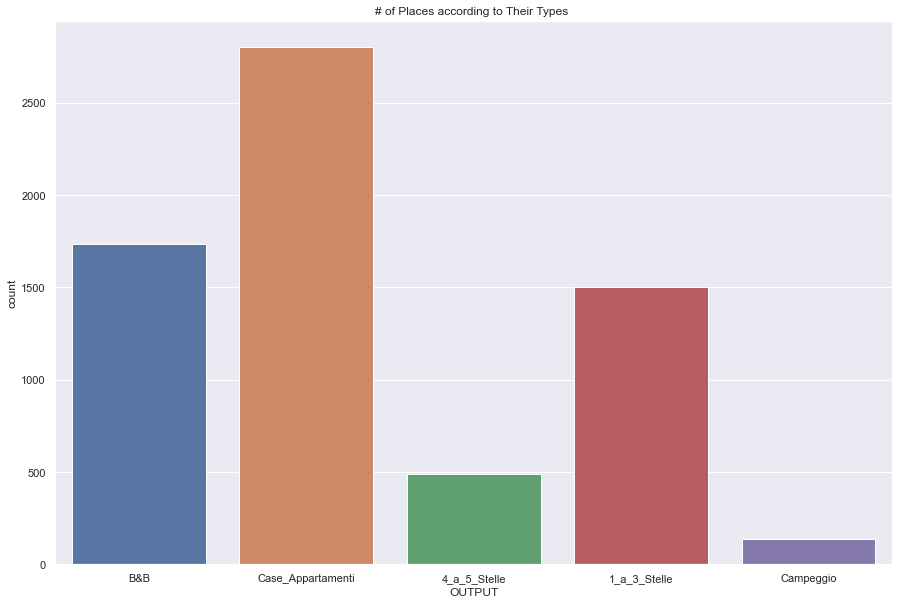

In [12]:
#Number of Places according to Their Types
fig = plt.figure(figsize=(15,10))
sns.set(style="darkgrid")
plt.title("# of Places according to Their Types ")
sns.countplot(df['OUTPUT'])

In [13]:
#Number of Hotels Across Provinces
df_province = df['PROVINCIA'].value_counts()[0:12].to_frame(name='Frequency')
df_province = df_province.reset_index()
df_province.rename(index=str, columns={"index": "Provincia", "frequency": "Frequency"}, inplace=True)
df_province

,Provincia,Frequency
0,BS,2065
1,MI,1395
2,BG,943
3,SO,575
4,CO,498
5,VA,296
6,LC,257
7,MN,200
8,PV,181
9,MB,127


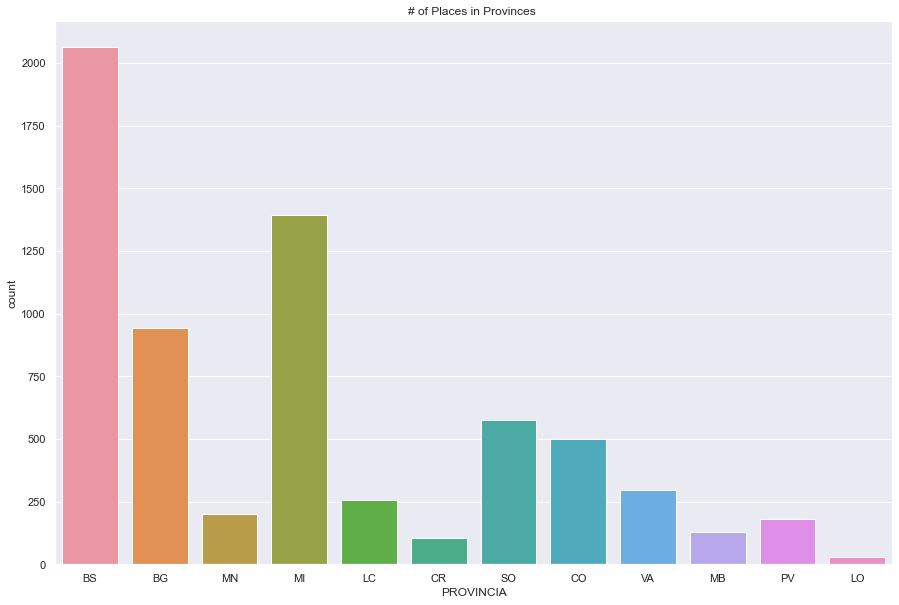

In [14]:
#Number of Hotels According to Province
plt.figure(figsize =(15,10))
sns.set(style="darkgrid")
plt.title("# of Places in Provinces ")
ax = sns.countplot(x = "PROVINCIA", data = df)

In [15]:
cor_data = df.copy()

In [16]:
cor_data.head()

,ID,PROVINCIA,COMUNE,CAMERE,SUITE,LETTI,BAGNI,PRIMA_COLAZIONE,IN_ABITATO,SUL_LAGO,VICINO_ELIPORTO,VICINO_AEREOPORTO,ZONA_CENTRALE,VICINO_IMP_RISALITA,ZONA_PERIFERICA,ZONA_STAZIONE_FS,ATTREZZATURE_VARIE,CARTE_ACCETTATE,LINGUE_PARLATE,OUTPUT
0,0,BS,PERTICA BASSA,2,0,4,1,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,B&B
1,1,BS,DESENZANO DEL GARDA,4,0,8,4,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,B&B
2,2,BG,BERGAMO,1,0,2,1,0,0,0,0,0,0,0,0,0,Accettazione animali domestici,NaN,NaN,Case_Appartamenti
3,3,MN,MANTOVA,93,2,194,96,0,0,0,0,0,0,0,0,0,"Ascensore,Ristorante,Bar,Accettazione animali ...","American express,Visa,Master Card,Diners,Maest...","Inglese,Francese,Spagnolo,Tedesco,Rumeno,Serbo...",4_a_5_Stelle
4,4,MI,MILANO,2,0,4,1,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,Case_Appartamenti


In [17]:
a = df.select_dtypes(object).columns
for i in a:
    print (i, df[i].nunique())

PROVINCIA 12
COMUNE 942
ATTREZZATURE_VARIE 2758
CARTE_ACCETTATE 703
LINGUE_PARLATE 211
OUTPUT 5


In [18]:
a = df.select_dtypes(int).columns
for i in a:
    print (i, df[i].nunique())

ID 6668
CAMERE 215
SUITE 50
LETTI 348
BAGNI 188
PRIMA_COLAZIONE 2
IN_ABITATO 2
SUL_LAGO 2
VICINO_ELIPORTO 2
VICINO_AEREOPORTO 2
ZONA_CENTRALE 2
VICINO_IMP_RISALITA 2
ZONA_PERIFERICA 2
ZONA_STAZIONE_FS 2


Text(0.5, 1.0, '# of Room Comparing to Bed ')

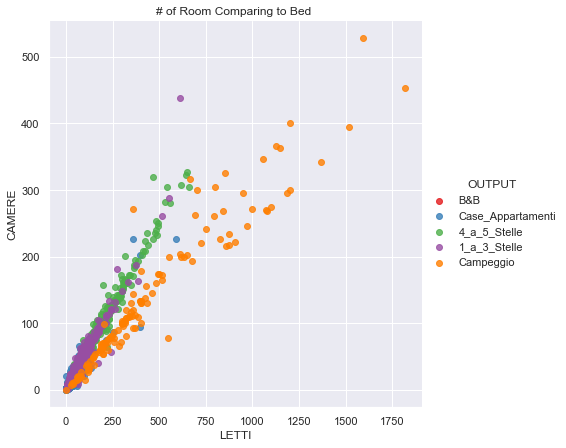

In [19]:
#Number of Room Comparing to Bed
sns.lmplot(x='LETTI', y='CAMERE', data=df,
          fit_reg=False,
          hue='OUTPUT',
          legend=True,
          palette="Set1",height=6)
plt.title("# of Room Comparing to Bed ")

In [20]:
le = LabelEncoder()

In [21]:
# This data will not be used while predicting cancellation. This is just for checking correlation.
cor_data['PROVINCIA'] = le.fit_transform(cor_data['PROVINCIA'])
cor_data['COMUNE'] = le.fit_transform(cor_data['COMUNE'])
cor_data['CAMERE'] = le.fit_transform(cor_data['CAMERE'])
cor_data['SUITE'] = le.fit_transform(cor_data['SUITE'])
cor_data['LETTI'] = le.fit_transform(cor_data['LETTI'])
cor_data['BAGNI'] = le.fit_transform(cor_data['BAGNI'])
cor_data['PRIMA_COLAZIONE'] = le.fit_transform(cor_data['PRIMA_COLAZIONE'])
cor_data['IN_ABITATO'] = le.fit_transform(cor_data['CAMERE'])
cor_data['SUL_LAGO'] = le.fit_transform(cor_data['SUL_LAGO'])
cor_data['VICINO_ELIPORTO'] = le.fit_transform(cor_data['VICINO_ELIPORTO'])
cor_data['VICINO_AEREOPORTO'] = le.fit_transform(cor_data['VICINO_AEREOPORTO'])
cor_data['ZONA_CENTRALE'] = le.fit_transform(cor_data['ZONA_CENTRALE'])
cor_data['VICINO_IMP_RISALITA'] = le.fit_transform(cor_data['VICINO_IMP_RISALITA'])
cor_data['ZONA_PERIFERICA'] = le.fit_transform(cor_data['ZONA_PERIFERICA'])
cor_data['ZONA_STAZIONE_FS'] = le.fit_transform(cor_data['ZONA_STAZIONE_FS'])
cor_data['ATTREZZATURE_VARIE'] = le.fit_transform(cor_data['ATTREZZATURE_VARIE'])
cor_data['CARTE_ACCETTATE'] = le.fit_transform(cor_data['CARTE_ACCETTATE'])
cor_data['LINGUE_PARLATE'] = le.fit_transform(cor_data['LINGUE_PARLATE'])
cor_data['OUTPUT'] = le.fit_transform(cor_data['OUTPUT'])

In [22]:
cor_data.corr()

,ID,PROVINCIA,COMUNE,CAMERE,SUITE,LETTI,BAGNI,PRIMA_COLAZIONE,IN_ABITATO,SUL_LAGO,VICINO_ELIPORTO,VICINO_AEREOPORTO,ZONA_CENTRALE,VICINO_IMP_RISALITA,ZONA_PERIFERICA,ZONA_STAZIONE_FS,ATTREZZATURE_VARIE,CARTE_ACCETTATE,LINGUE_PARLATE,OUTPUT
ID,1.000000,-0.001138,0.009904,0.008897,0.002633,0.007181,0.007609,0.023297,0.008897,0.010389,-0.008045,0.005254,0.010674,-0.021934,-0.002472,0.002962,-0.004240,-0.007732,-0.002051,0.004497
PROVINCIA,-0.001138,1.000000,0.050438,0.076185,0.120791,0.077914,0.118488,0.095127,0.076185,-0.106033,0.039011,0.170357,0.158303,-0.057793,0.084578,0.196832,-0.257960,-0.175506,-0.297363,-0.196708
COMUNE,0.009904,0.050438,1.000000,0.009100,-0.024779,0.006633,0.003364,-0.010151,0.009100,0.028992,0.017378,0.015236,-0.019602,-0.005950,-0.005945,0.002324,0.095524,0.021745,0.043474,0.037234
CAMERE,0.008897,0.076185,0.009100,1.000000,0.300366,0.979528,0.922874,0.177775,1.000000,0.317743,0.044607,0.053089,0.036017,0.027950,-0.024714,0.104363,-0.044152,-0.396565,-0.196539,-0.297247
SUITE,0.002633,0.120791,-0.024779,0.300366,1.000000,0.291911,0.355822,0.085885,0.300366,0.015169,0.058035,0.003404,0.059154,0.005193,-0.013931,0.060332,-0.032573,-0.210295,-0.090285,-0.155058
LETTI,0.007181,0.077914,0.006633,0.979528,0.291911,1.000000,0.882423,0.159492,0.979528,0.360623,0.043951,0.044073,0.021364,0.027749,-0.027966,0.082351,-0.034246,-0.376564,-0.183176,-0.269290
BAGNI,0.007609,0.118488,0.003364,0.922874,0.355822,0.882423,1.000000,0.237039,0.922874,0.205343,0.054766,0.075058,0.068377,0.038261,-0.010930,0.142142,-0.094059,-0.480240,-0.234869,-0.389504
PRIMA_COLAZIONE,0.023297,0.095127,-0.010151,0.177775,0.085885,0.159492,0.237039,1.000000,0.177775,0.107344,0.032223,0.040988,0.112958,0.044196,0.032333,0.062857,-0.084721,-0.355932,-0.263788,-0.331451
IN_ABITATO,0.008897,0.076185,0.009100,1.000000,0.300366,0.979528,0.922874,0.177775,1.000000,0.317743,0.044607,0.053089,0.036017,0.027950,-0.024714,0.104363,-0.044152,-0.396565,-0.196539,-0.297247
SUL_LAGO,0.010389,-0.106033,0.028992,0.317743,0.015169,0.360623,0.205343,0.107344,0.317743,1.000000,-0.005818,-0.040562,-0.032872,-0.014569,-0.046730,-0.045683,0.014748,-0.130100,-0.075658,-0.196589


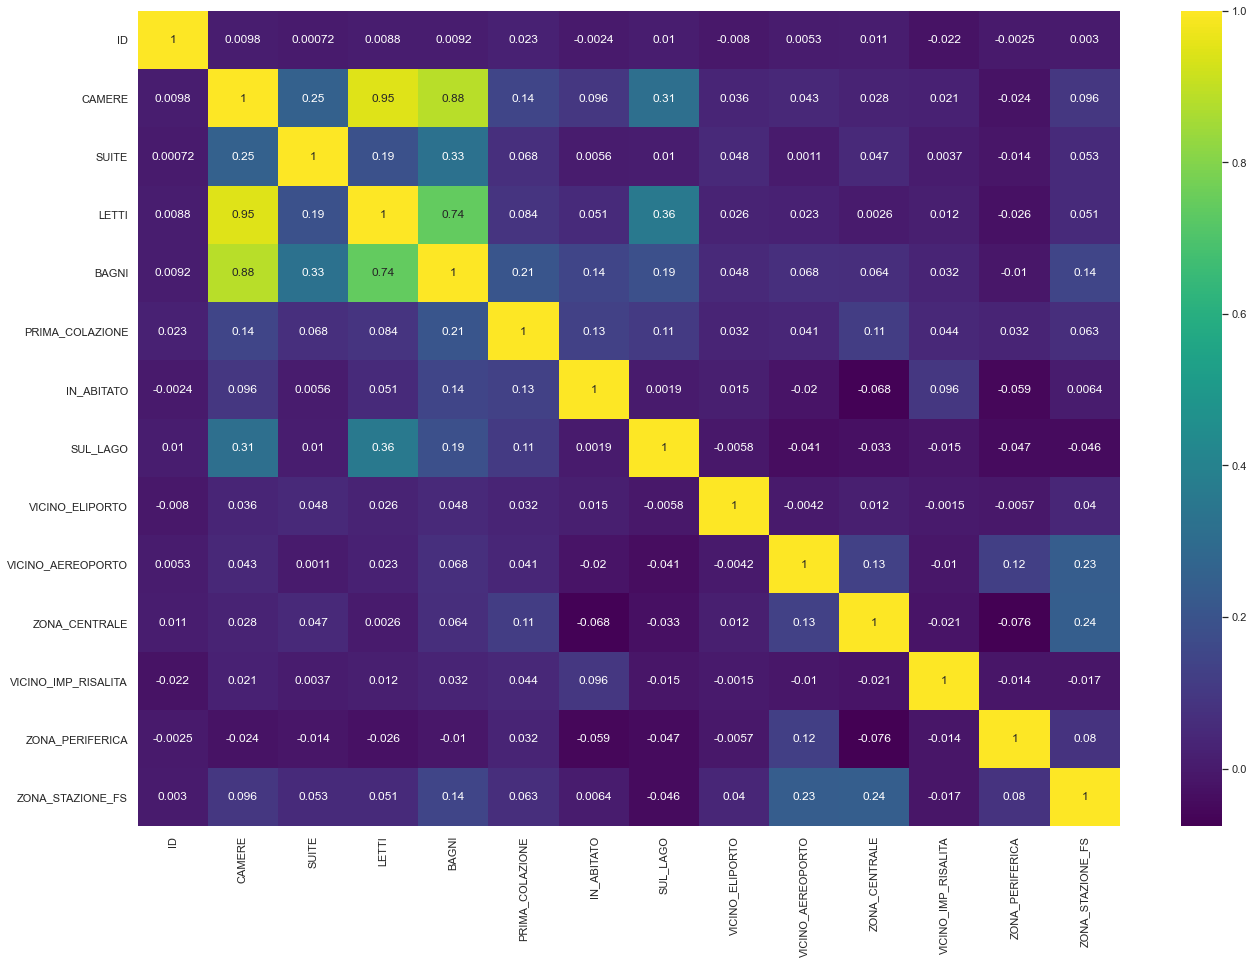

In [23]:
#Pearson Correlation
plt.figure(figsize =(22,15))
sns.heatmap(df.corr(method = 'pearson'), annot = True, cmap = "viridis")
plt.show()

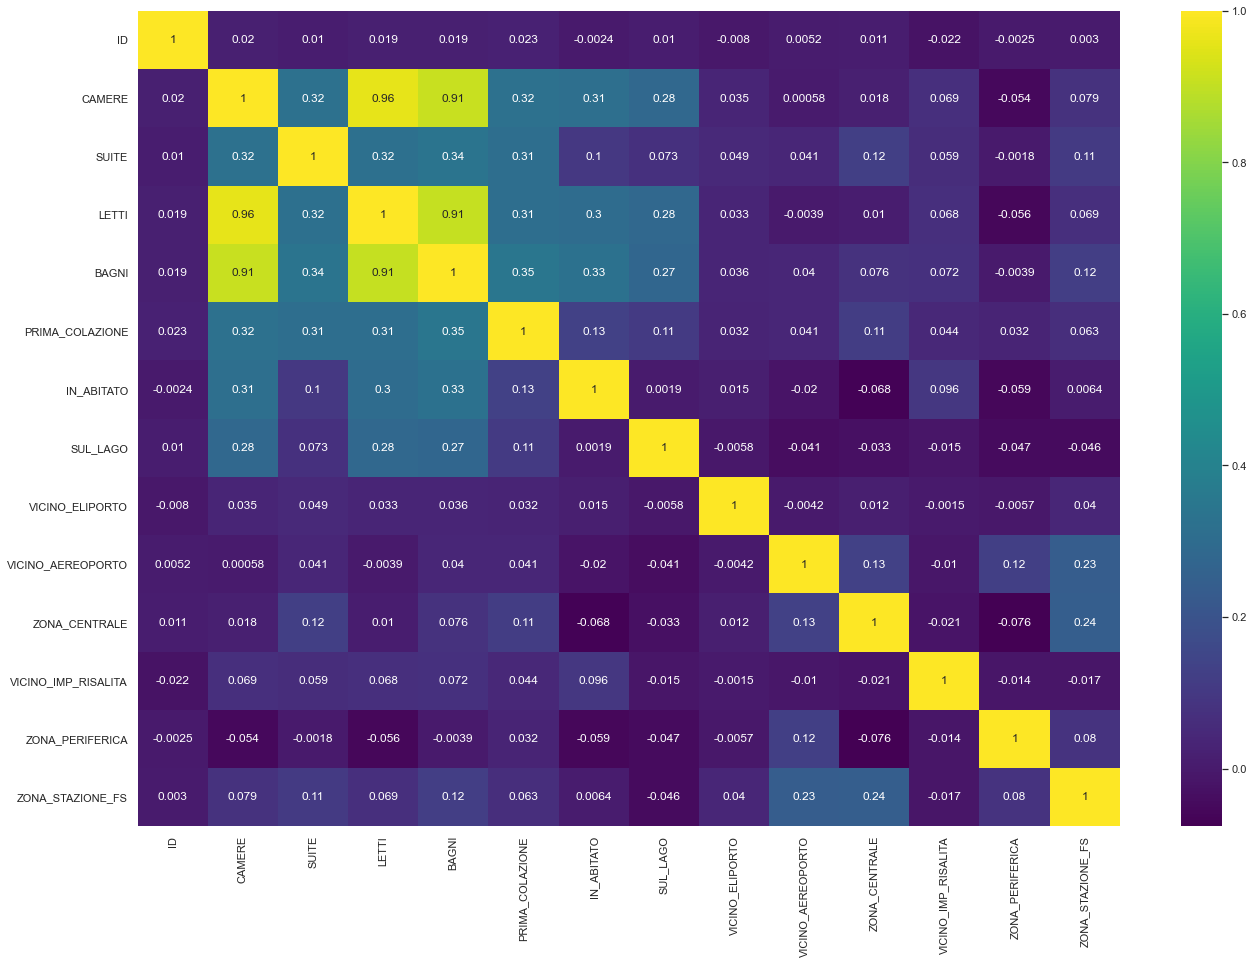

In [24]:
#Spearman Correlation
plt.figure(figsize =(22,15))
sns.heatmap(df.corr(method = 'spearman'), annot = True, cmap = "viridis")
plt.show()

# Training and Testing

In [25]:
list_1=list(df.columns)
list_1

['ID',
 'PROVINCIA',
 'COMUNE',
 'CAMERE',
 'SUITE',
 'LETTI',
 'BAGNI',
 'PRIMA_COLAZIONE',
 'IN_ABITATO',
 'SUL_LAGO',
 'VICINO_ELIPORTO',
 'VICINO_AEREOPORTO',
 'ZONA_CENTRALE',
 'VICINO_IMP_RISALITA',
 'ZONA_PERIFERICA',
 'ZONA_STAZIONE_FS',
 'ATTREZZATURE_VARIE',
 'CARTE_ACCETTATE',
 'LINGUE_PARLATE',
 'OUTPUT']

In [26]:
list_cate=[]
for i in list_1:
    if df[i].dtype=='object':
        list_cate.append(i)

In [27]:
for i in list_cate:
    df[i]=le.fit_transform(df[i])

In [28]:
df.head()

,ID,PROVINCIA,COMUNE,CAMERE,SUITE,LETTI,BAGNI,PRIMA_COLAZIONE,IN_ABITATO,SUL_LAGO,VICINO_ELIPORTO,VICINO_AEREOPORTO,ZONA_CENTRALE,VICINO_IMP_RISALITA,ZONA_PERIFERICA,ZONA_STAZIONE_FS,ATTREZZATURE_VARIE,CARTE_ACCETTATE,LINGUE_PARLATE,OUTPUT
0,0,1,629,2,0,4,1,0,0,0,0,0,0,0,0,0,2758,703,211,2
1,1,1,336,4,0,8,4,0,0,0,0,0,0,0,0,0,2758,703,211,2
2,2,0,67,1,0,2,1,0,0,0,0,0,0,0,0,0,782,703,211,4
3,3,8,499,93,2,194,96,0,0,0,0,0,0,0,0,0,1293,358,92,1
4,4,7,530,2,0,4,1,0,0,0,0,0,0,0,0,0,2758,703,211,4


In [29]:
X = df.drop(['OUTPUT'], axis=1)
y = df['OUTPUT']

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)

In [31]:
X_train.shape, X_test.shape

((4467, 19), (2201, 19))

<AxesSubplot:>

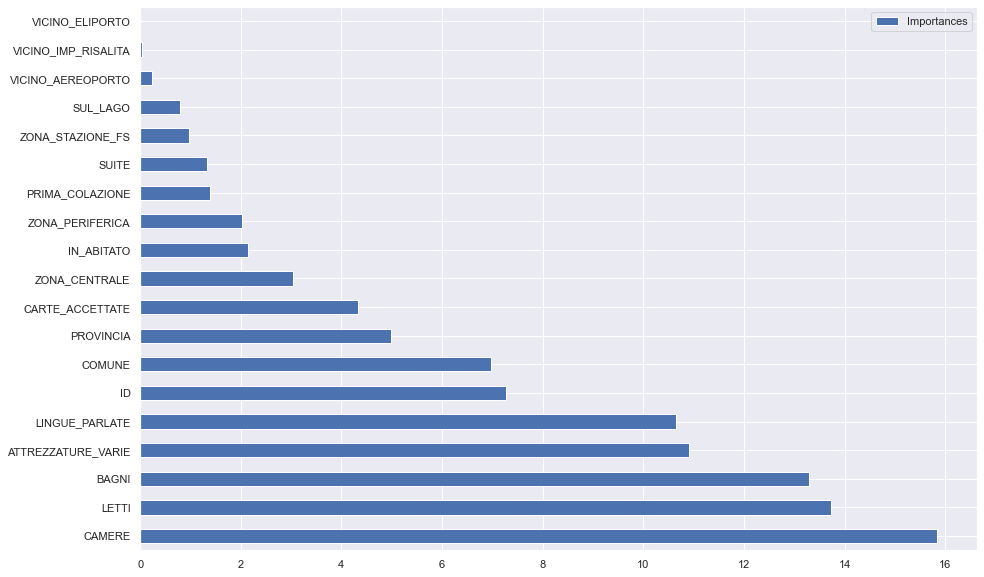

In [32]:
randomf = RandomForestClassifier()
rf_model1 = randomf.fit(X_train, y_train)

pd.DataFrame(data = rf_model1.feature_importances_*100,
                   columns = ["Importances"],
                   index = X_train.columns).sort_values("Importances", ascending = False).plot(
    kind = "barh",label = ("Feature Importances (%)"), color = "b", figsize =(15,10))

### Modelling

#### 1-Logistic Regression

In [33]:
reg = LogisticRegression()
reg.fit(X_train,y_train)

LogisticRegression()

In [34]:
y_pred_reg=reg.predict(X_test)
acc_reg = accuracy_score(y_test, y_pred_reg)
print("Classification Report is:\n",classification_report(y_test,y_pred_reg))
print("Confusion Matrix:\n",confusion_matrix(y_test,y_pred_reg))
print("Training Score:\n",reg.score(X_train,y_train)*100)
print(f"Accuracy Score of Logistic Regression is : {acc_reg}")

Classification Report is:
               precision    recall  f1-score   support

           0       0.69      0.57      0.62       508
           1       0.67      0.45      0.54       143
           2       0.74      0.37      0.49       597
           3       0.95      0.73      0.83        52
           4       0.60      0.90      0.72       901

    accuracy                           0.65      2201
   macro avg       0.73      0.60      0.64      2201
weighted avg       0.67      0.65      0.63      2201

Confusion Matrix:
 [[291  26  15   1 175]
 [ 63  65   1   0  14]
 [ 35   0 218   0 344]
 [ 10   3   0  38   1]
 [ 25   3  62   1 810]]
Training Score:
 66.35325721961047
Accuracy Score of Logistic Regression is : 0.6460699681962744


#### 2-K Neighbors Classification

In [35]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

y_pred_knn = knn.predict(X_test)

acc_knn = accuracy_score(y_test, y_pred_knn)
conf = confusion_matrix(y_test, y_pred_knn)
clf_report = classification_report(y_test, y_pred_knn)

print(f"Accuracy Score of KNN is : {acc_knn}")
print(f"Confusion Matrix : \n{conf}")
print(f"Classification Report : \n{clf_report}")

Accuracy Score of KNN is : 0.6338028169014085
Confusion Matrix : 
[[343  32  69   1  63]
 [ 77  51   4   0  11]
 [ 50   1 256   0 290]
 [ 18   0   7  20   7]
 [ 20   2 154   0 725]]
Classification Report : 
              precision    recall  f1-score   support

           0       0.68      0.68      0.68       508
           1       0.59      0.36      0.45       143
           2       0.52      0.43      0.47       597
           3       0.95      0.38      0.55        52
           4       0.66      0.80      0.73       901

    accuracy                           0.63      2201
   macro avg       0.68      0.53      0.57      2201
weighted avg       0.63      0.63      0.62      2201



#### 3-Decision Tree Classification

In [36]:
dtree = DecisionTreeClassifier(max_depth=6, random_state=123,criterion='entropy')
dtree.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=6, random_state=123)

In [37]:
y_pred=dtree.predict(X_test)
conf =print(confusion_matrix(y_test, y_pred))
clf =print(classification_report(y_test, y_pred))
decision_tree_score=accuracy_score(y_test,y_pred)
decision_tree_score

[[432  42   4   2  28]
 [ 54  84   0   1   4]
 [  0   0 476   0 121]
 [  0   2   0  49   1]
 [  6   0  85   4 806]]
              precision    recall  f1-score   support

           0       0.88      0.85      0.86       508
           1       0.66      0.59      0.62       143
           2       0.84      0.80      0.82       597
           3       0.88      0.94      0.91        52
           4       0.84      0.89      0.87       901

    accuracy                           0.84      2201
   macro avg       0.82      0.81      0.82      2201
weighted avg       0.84      0.84      0.84      2201



0.8391640163562017

#### 4-Random Forest Classification

In [38]:
rfc=RandomForestClassifier()
rfc.fit(X_train,y_train)

RandomForestClassifier()

In [39]:
y_pred=rfc.predict(X_test)
conf =print(confusion_matrix(y_test, y_pred))
clf =print(classification_report(y_test, y_pred))
random_forest_score=accuracy_score(y_test,y_pred)
random_forest_score

[[457  32   3   0  16]
 [ 60  80   0   0   3]
 [  0   0 493   0 104]
 [  1   0   0  49   2]
 [  9   2  48   0 842]]
              precision    recall  f1-score   support

           0       0.87      0.90      0.88       508
           1       0.70      0.56      0.62       143
           2       0.91      0.83      0.86       597
           3       1.00      0.94      0.97        52
           4       0.87      0.93      0.90       901

    accuracy                           0.87      2201
   macro avg       0.87      0.83      0.85      2201
weighted avg       0.87      0.87      0.87      2201



0.8727850976828714

#### 5-AdaBoost Classification

In [40]:
adb = AdaBoostClassifier(base_estimator = None)
adb.fit(X_train,y_train)

AdaBoostClassifier()

In [41]:
y_pred=adb.predict(X_test)
conf =print(confusion_matrix(y_test, y_pred))
clf =print(classification_report(y_test, y_pred))
adaboost_score=accuracy_score(y_test,y_pred)
adaboost_score

[[311  59   5   2 131]
 [ 19  23   0   1 100]
 [  0   0 542   0  55]
 [  0   0   0  30  22]
 [ 62   0 534   4 301]]
              precision    recall  f1-score   support

           0       0.79      0.61      0.69       508
           1       0.28      0.16      0.20       143
           2       0.50      0.91      0.65       597
           3       0.81      0.58      0.67        52
           4       0.49      0.33      0.40       901

    accuracy                           0.55      2201
   macro avg       0.58      0.52      0.52      2201
weighted avg       0.56      0.55      0.53      2201



0.5483870967741935

#### 6-Gradient Boosting Classification

In [42]:
gbc=GradientBoostingClassifier()
gbc.fit(X_train,y_train)

GradientBoostingClassifier()

In [43]:
y_pred=gbc.predict(X_test)
conf =print(confusion_matrix(y_test, y_pred))
clf =print(classification_report(y_test, y_pred))
gradient_boosting_score=accuracy_score(y_test,y_pred)
gradient_boosting_score

[[463  28   1   0  16]
 [ 56  84   0   0   3]
 [  0   0 474   0 123]
 [  1   0   0  50   1]
 [  7   2  43   2 847]]
              precision    recall  f1-score   support

           0       0.88      0.91      0.89       508
           1       0.74      0.59      0.65       143
           2       0.92      0.79      0.85       597
           3       0.96      0.96      0.96        52
           4       0.86      0.94      0.90       901

    accuracy                           0.87      2201
   macro avg       0.87      0.84      0.85      2201
weighted avg       0.87      0.87      0.87      2201



0.8714220808723308

#### 7-XGB Classification

In [44]:
xgb =XGBClassifier(objective ='reg:linear', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 5, alpha = 10, n_estimators = 10)

xgb.fit(X_train, y_train)

[01:57:24] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(alpha=10, base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.3,
              enable_categorical=False, gamma=0, gpu_id=-1,
              importance_type=None, interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=5,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=10, n_jobs=8, num_parallel_tree=1,
              objective='multi:softprob', predictor='auto', random_state=0,
              reg_alpha=10, reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [45]:
y_pred=xgb.predict(X_test)
conf =print(confusion_matrix(y_test, y_pred))
clf =print(classification_report(y_test, y_pred))
xgb_score=accuracy_score(y_test,y_pred)
xgb_score

[[443  28   3   1  33]
 [ 66  74   0   1   2]
 [  0   0 329   0 268]
 [  6   3   0  36   7]
 [ 29   1  19   0 852]]
              precision    recall  f1-score   support

           0       0.81      0.87      0.84       508
           1       0.70      0.52      0.59       143
           2       0.94      0.55      0.69       597
           3       0.95      0.69      0.80        52
           4       0.73      0.95      0.83       901

    accuracy                           0.79      2201
   macro avg       0.83      0.72      0.75      2201
weighted avg       0.81      0.79      0.78      2201



0.7878237164925034

#### 8-ExtraTrees Classification

In [46]:
etc = ExtraTreesClassifier(n_estimators=100, random_state=0)
etc.fit(X_train,y_train)

ExtraTreesClassifier(random_state=0)

In [47]:
y_pred=etc.predict(X_test)
conf =print(confusion_matrix(y_test, y_pred))
clf =print(classification_report(y_test, y_pred))
extraTree_score=accuracy_score(y_test,y_pred)
extraTree_score

[[454  33   2   1  18]
 [ 60  80   0   1   2]
 [  0   0 475   0 122]
 [  1   0   0  50   1]
 [  5   1  54   0 841]]
              precision    recall  f1-score   support

           0       0.87      0.89      0.88       508
           1       0.70      0.56      0.62       143
           2       0.89      0.80      0.84       597
           3       0.96      0.96      0.96        52
           4       0.85      0.93      0.89       901

    accuracy                           0.86      2201
   macro avg       0.86      0.83      0.84      2201
weighted avg       0.86      0.86      0.86      2201



0.8632439800090868

#### 9-Bagging  Classification

In [48]:
bagging_model = BaggingClassifier(tree.DecisionTreeClassifier(random_state=1))
bagging_model.fit(X_train, y_train)
bagging_model.score(X_test,y_test)

0.8514311676510677

# RESULT

In [49]:
print("Logistic Regression Score:",acc_reg)
print("K Neighbors Classifier Score:",acc_knn)
print("DecisionTree Classifier Score:",decision_tree_score)
print("Random Forest Classifier Score:",random_forest_score)
print("AdaBoost Classifier Score:",adaboost_score)
print("Gradient Boosting Classifier Score:",gradient_boosting_score)
print("XGB Classifier Score:",xgb_score)
print("ExtraTree Classifier Score:",extraTree_score)
print("Bagging Classifier Score:",bagging_model.score(X_test,y_test))

Logistic Regression Score: 0.6460699681962744
K Neighbors Classifier Score: 0.6338028169014085
DecisionTree Classifier Score: 0.8391640163562017
Random Forest Classifier Score: 0.8727850976828714
AdaBoost Classifier Score: 0.5483870967741935
Gradient Boosting Classifier Score: 0.8714220808723308
XGB Classifier Score: 0.7878237164925034
ExtraTree Classifier Score: 0.8632439800090868
Bagging Classifier Score: 0.8514311676510677


According the scores,Random Forest Classifier gives best result with  <b>0.872785</b>. Also Gradient Boosting is gives very close to Random Forest Classifier with <b>0.871422</b>, and finally AdaBoost is give the worst performance with <b>0.548387</b>.